<a href="https://colab.research.google.com/github/lauren123cat/UCLA-ECE219-W25/blob/main/recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## QUESTION 1: Explore the Dataset: In this question, we explore the structure of the data.
A Compute the sparsity of the movie rating dataset:
Sparsity =
Total number of available ratings
Total number of possible ratings (1)
B Plot a histogram showing the frequency of the rating values: Bin the raw rating values
into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the
number of entries in the ratings matrix R that fall within each bin and use this count as the
height of the vertical axis for that particular bin. Comment on the shape of the histogram.
C Plot the distribution of the number of ratings received among movies: The X-axis
should be the movie index ordered by decreasing frequency and the Y -axis should be the number
of ratings the movie has received; ties can broken in any way. A monotonically decreasing trend
is expected.
D Plot the distribution of ratings among users: The X-axis should be the user index ordered
by decreasing frequency and the Y -axis should be the number of movies the user has rated.
The requirement of the plot is similar to that in Question C.
E Discuss the salient features of the distributions from Questions C,D and their implications
for the recommendation process.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

ratings = pd.read_csv('/content/drive/MyDrive/ECE 219/p3/data/Copy of ratings.csv')

ratings.head()


,Unnamed: 0,userId,movieId,rating,timestamp
0,0,496,112852,3.0,1415520462
1,1,391,1947,4.0,1030945141
2,2,387,1562,1.5,1095041022
3,3,474,2716,4.5,1053020930
4,4,483,88125,4.5,1311337237


In [ ]:
len_ratings = len(ratings)

total_users = len(ratings['userId'].unique())

total_movies = len(ratings['movieId'].unique())

total_available_ratings = len_ratings
total_possible_ratings = total_users * total_movies

sparsity = total_available_ratings / total_possible_ratings

print(f"Sparsity: {sparsity}")

Sparsity: 0.016999683055613623


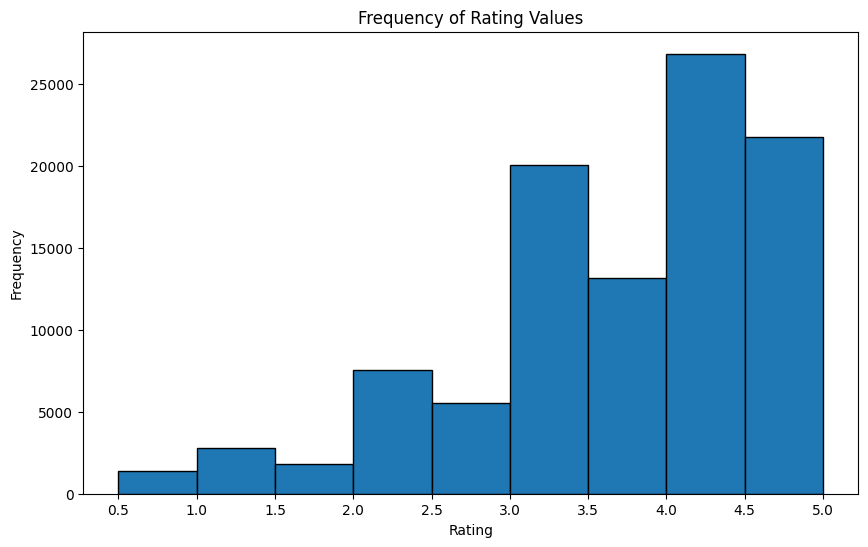

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(0.5, 5.5, 0.5)

plt.figure(figsize=(10, 6))

plt.hist(ratings['rating'], bins=bins, edgecolor='black')
plt.xticks(bins)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Rating Values')

plt.show()

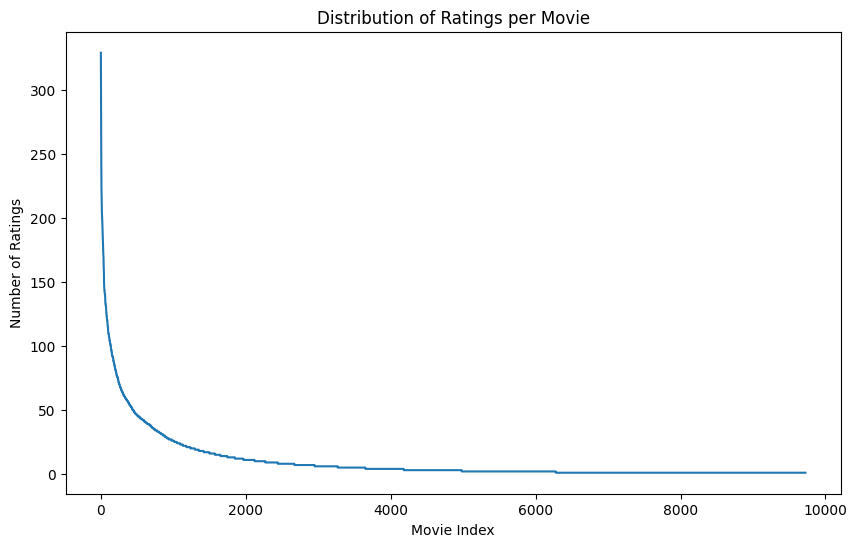

In [ ]:
movie_rating_counts = ratings['movieId'].value_counts()

plt.figure(figsize=(10, 6))

plt.plot(movie_rating_counts.values)
plt.xlabel('Movie Index')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings per Movie')

plt.show()

Text(0.5, 1.0, 'Distribution of Ratings per User')

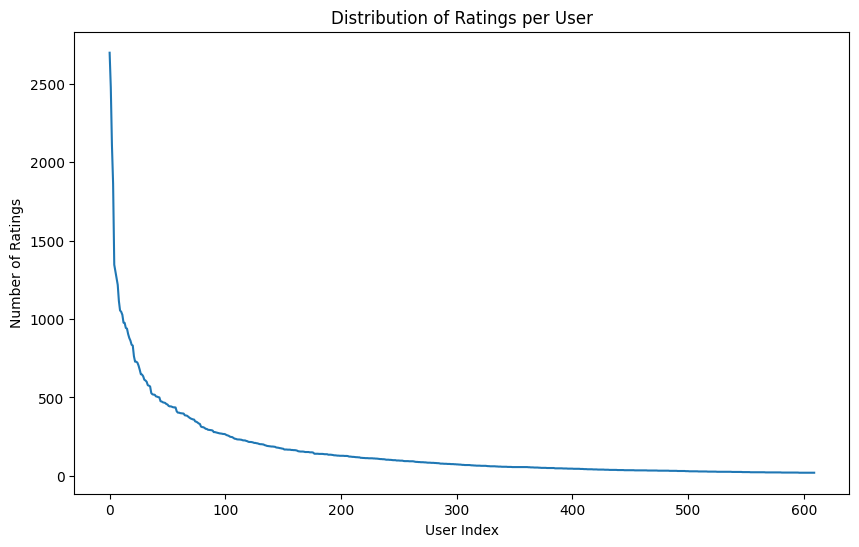

In [ ]:
user_rating_counts = ratings['userId'].value_counts()

plt.figure(figsize=(10, 6))

plt.plot(user_rating_counts.values)
plt.xlabel('User Index')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings per User')

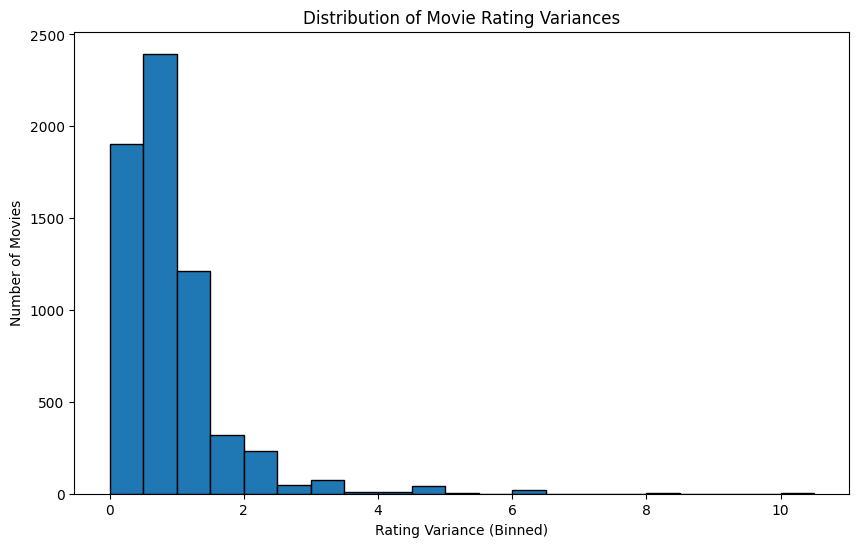

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


movie_variances = ratings.groupby('movieId')['rating'].var()

bins = np.arange(0, movie_variances.max() + 0.5, 0.5)

plt.figure(figsize=(10, 6))
plt.hist(movie_variances, bins=bins, edgecolor='black')
plt.xlabel('Rating Variance (Binned)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Rating Variances')
plt.show()


## QUESTION 2: Understanding the Pearson Correlation Coefficient:
A Write down the formula for µu in terms of Iu and ruk;
B In plain words, explain the meaning of Iu ∩ Iv. Can Iu ∩ Iv = ∅? (Hint: Rating matrix R is
sparse)

## QUESTION 4: Design a k-NN collaborative filter to predict the ratings of the movies in the
original dataset and evaluate its performance using 10-fold cross validation. Sweep k (number of
neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average
MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis)
against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505172 sha256=0b6082688b4095d7f8fdf1f32ab007aaf8273cd2516f2a20d27886bd63674fb9
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
"""
from surprise import Dataset, Reader, KNNWithMeans
from surprise.model_selection import cross_validate
import pandas as pd

reader = Reader(rating_scale=(.5, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

k_vals = np.arange(2, 102, 2)

results = []

for k in k_vals:
    algo = KNNWithMeans(k=k, sim_options={'name': 'pearson', 'user_based': True})

    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10)

    avg_rmse = np.mean(cv_results['test_rmse'])
    avg_mae = np.mean(cv_results['test_mae'])

    results.append((k, avg_rmse, avg_mae))

import pandas as pd

results_df = pd.DataFrame(results, columns=['k', 'Avg RMSE', 'Avg MAE'])
results_df.to_csv('/content/drive/MyDrive/ECE 219/p3/kfold_res.csv', index=False)

results_df.head()
"""

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

KeyboardInterrupt: 

In [ ]:
results_df = pd.read_csv('/content/drive/MyDrive/ECE 219/p3/kfold_res.csv')

results_df.head()

,k,Avg RMSE,Avg MAE
0,2,1.018475,0.785546
1,4,0.945270,0.726798
2,6,0.921725,0.706057
3,8,0.909242,0.695564
4,10,0.902947,0.689646


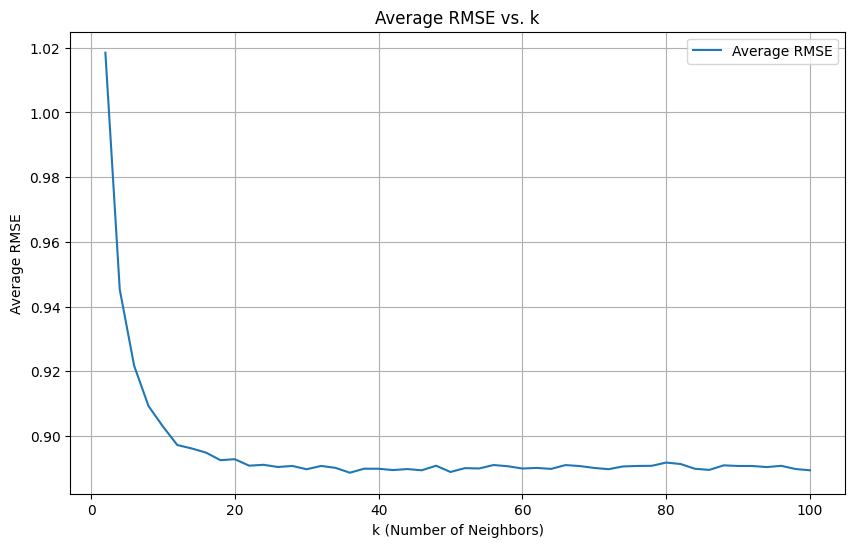

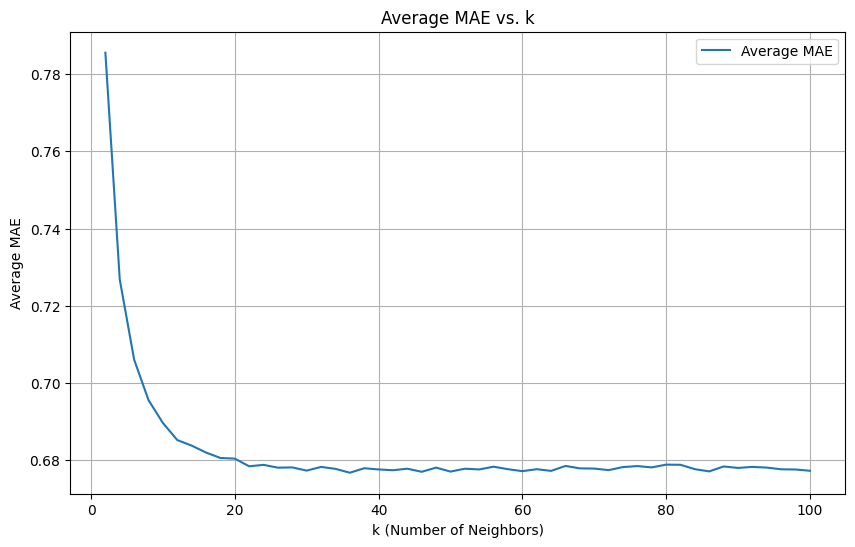

In [ ]:
import matplotlib.pyplot as plt

# Plot for RMSE
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['Avg RMSE'], label='Average RMSE')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. k')
plt.legend()
plt.grid(True)
plt.show()

# Plot for MAE
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['Avg MAE'], label='Average MAE')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average MAE')
plt.title('Average MAE vs. k')
plt.legend()
plt.grid(True)
plt.show()

## QUESTION 5: Use the plot from question 4, to find a ’minimum k’. Note: The term ’minimum
k’ in this context means that increasing k above the minimum value would not result in a significant
decrease in average RMSE or average MAE. If you get the plot correct, then ’minimum k’ would
correspond to the k value for which average RMSE and average MAE converges to a steady-state
value. Please report the steady state values of average RMSE and average MAE.

In [ ]:
steady_state_index = 20

steady_state_rmse = results_df['Avg RMSE'][steady_state_index]
steady_state_mae = results_df['Avg MAE'][steady_state_index]

print(f"Minimum k: {steady_state_index}")
print(f"Steady-state average RMSE: {steady_state_rmse}")
print(f"Steady-state average MAE: {steady_state_mae}")

Minimum k: 20
Steady-state average RMSE: 0.8894643580299133
Steady-state average MAE: 0.6774083566767397


In [ ]:
import pandas as pd


# Popular Movie Trimming
popular_movies = ratings.groupby('movieId').size() > 2
popular_subset = ratings[ratings['movieId'].isin(popular_movies[popular_movies].index)]

# Unpopular Movie Trimming
unpopular_movies = ratings.groupby('movieId').size() <= 2
unpopular_subset = ratings[ratings['movieId'].isin(unpopular_movies[unpopular_movies].index)]

# High Variance Movie Trimming
movie_variance = ratings.groupby('movieId')['rating'].var()
high_variance_subset = ratings.groupby('movieId').filter(
    lambda x: x['rating'].var() >= 2 and len(x) >= 5
)

popular_subset.head()


,Unnamed: 0,userId,movieId,rating,timestamp
0,0,496,112852,3.0,1415520462
1,1,391,1947,4.0,1030945141
2,2,387,1562,1.5,1095041022
3,3,474,2716,4.5,1053020930
4,4,483,88125,4.5,1311337237


In [ ]:
unpopular_subset.head()


,Unnamed: 0,userId,movieId,rating,timestamp
11,11,414,1040,3.0,965067631
14,14,474,3125,4.0,1014924099
19,19,606,32862,4.0,1171813113
21,21,606,6789,4.0,1171375616
35,35,610,71910,2.5,1493848618


In [ ]:
high_variance_subset.head()

,Unnamed: 0,userId,movieId,rating,timestamp
215,215,83,7669,4.0,1332840342
281,281,554,901,4.0,944900345
920,920,564,85367,4.0,1478454021
973,973,160,4735,4.5,1065992184
1025,1025,318,86377,4.0,1413560299


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, KNNWithMeans, accuracy
from surprise.model_selection import KFold, train_test_split
from sklearn.metrics import roc_curve, auc
import os

def evaluate_knn(data, dataset_name):
    rmse_results_file = f"/content/drive/MyDrive/ECE 219/p3/{dataset_name}_rmse_results.csv"

    if os.path.exists(rmse_results_file):
        # Load RMSE results from CSV if it exists
        rmse_results_df = pd.read_csv(rmse_results_file)
        rmse_results = list(zip(rmse_results_df['k'], rmse_results_df['avg_rmse']))
    else:
        # Calculate RMSE if CSV doesn't exist
        reader = Reader(rating_scale=(0.5, 5))
        surprise_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

        k_vals = np.arange(2, 102, 2)
        rmse_results = []

        for k in k_vals:
            algo = KNNWithMeans(k=k, sim_options={'name': 'pearson', 'user_based': True})
            kf = KFold(n_splits=10)
            fold_rmse = []

            for trainset, testset in kf.split(surprise_data):
                algo.fit(trainset)
                predictions = algo.test(testset)
                fold_rmse.append(accuracy.rmse(predictions, verbose=False))

            rmse_results.append((k, np.mean(fold_rmse)))

        # Save RMSE results to CSV
        rmse_results_df = pd.DataFrame(rmse_results, columns=['k', 'avg_rmse'])
        rmse_results_df.to_csv(rmse_results_file, index=False)


    # Plot average RMSE against k
    plt.figure(figsize=(10, 6))
    plt.plot([result[0] for result in rmse_results], [result[1] for result in rmse_results])
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Average RMSE')
    plt.title(f'Average RMSE vs. k for {dataset_name} Dataset')
    plt.grid(True)
    plt.show()

    # Report minimum average RMSE
    min_rmse = min(rmse_results, key=lambda x: x[1])
    print(f"Minimum average RMSE for {dataset_name}: {min_rmse[1]} at k = {min_rmse[0]}")

    # ROC curves and AUC
    best_k = min(rmse_results, key=lambda x: x[1])[0]
    algo = KNNWithMeans(k=best_k, sim_options={'name': 'pearson', 'user_based': True})

    # Convert DataFrame to Surprise Dataset
    reader = Reader(rating_scale=(0.5, 5))
    surprise_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

    # Split data using Surprise's train_test_split
    trainset, testset = train_test_split(surprise_data, test_size=.1)

    algo.fit(trainset)
    predictions = algo.test(testset)

    thresholds = [2.5, 3, 3.5, 4]
    plt.figure(figsize=(10, 6))

    for threshold in thresholds:
        y_true = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
        y_scores = [pred.est for pred in predictions]
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'Threshold = {threshold}, AUC = {roc_auc:.2f}')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {dataset_name} Dataset')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()




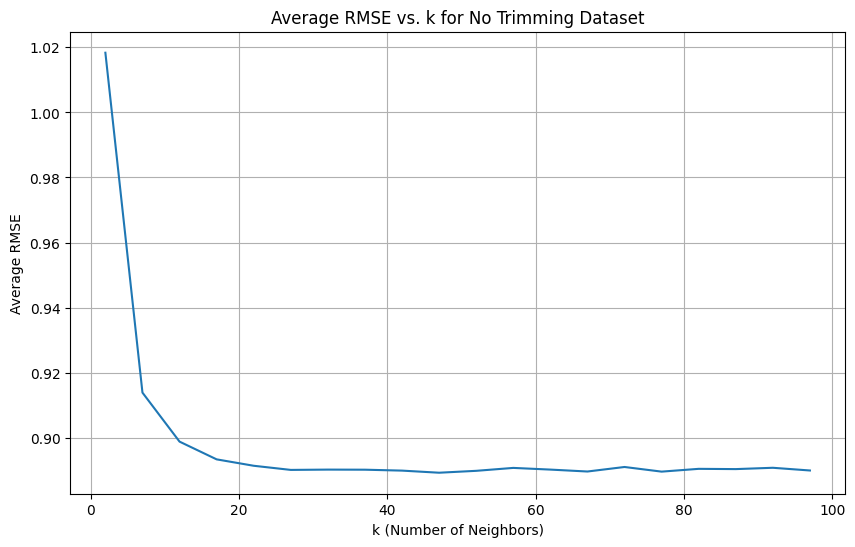

Minimum average RMSE for No Trimming: 0.8892533101524311 at k = 47
Computing the pearson similarity matrix...
Done computing similarity matrix.


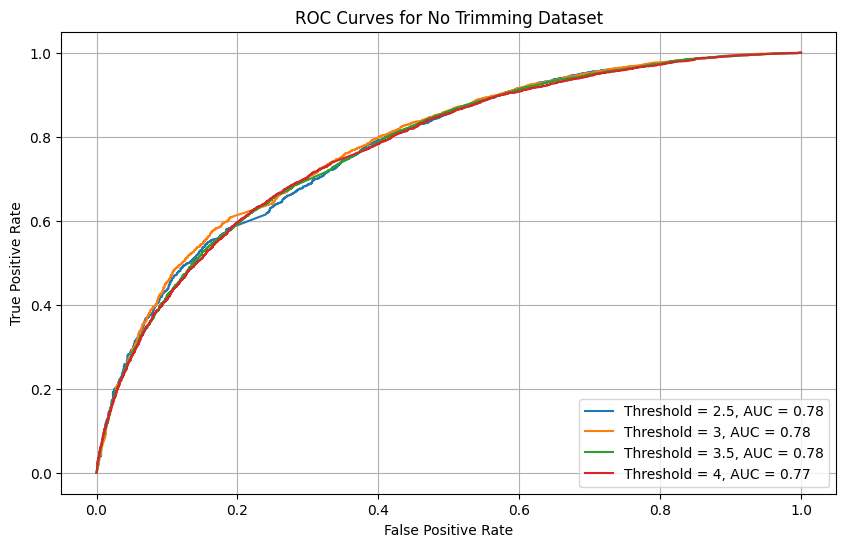

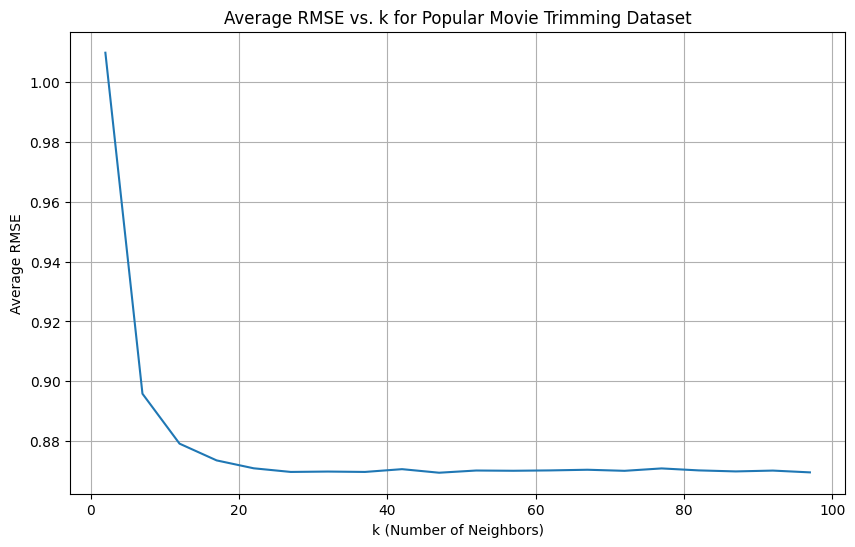

Minimum average RMSE for Popular Movie Trimming: 0.8694802376260922 at k = 47
Computing the pearson similarity matrix...
Done computing similarity matrix.


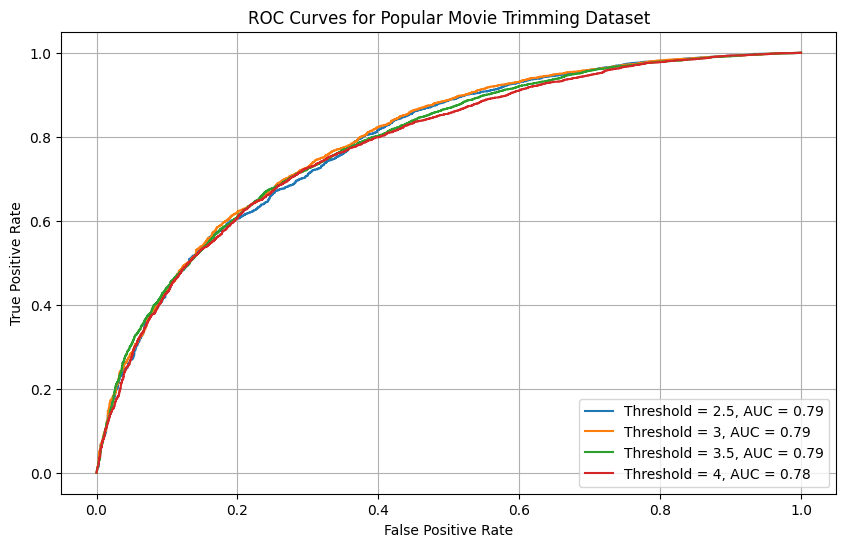

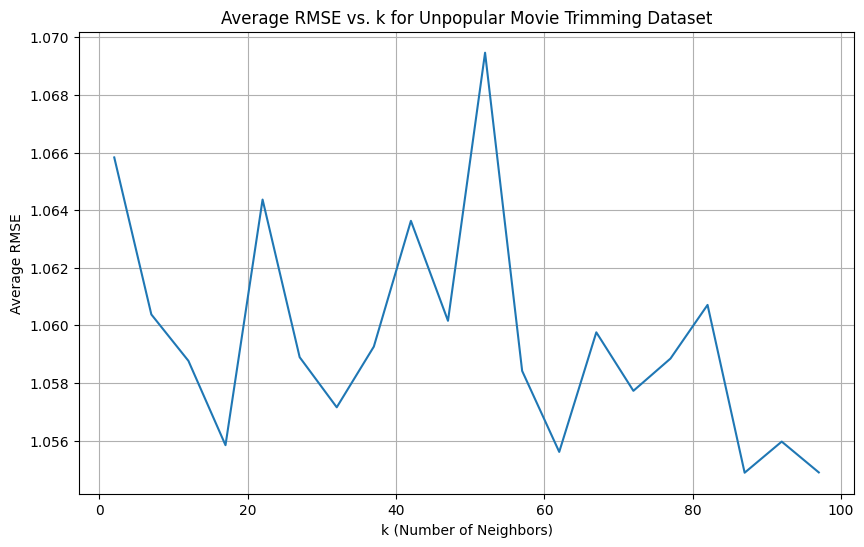

Minimum average RMSE for Unpopular Movie Trimming: 1.0548840388306164 at k = 87
Computing the pearson similarity matrix...
Done computing similarity matrix.


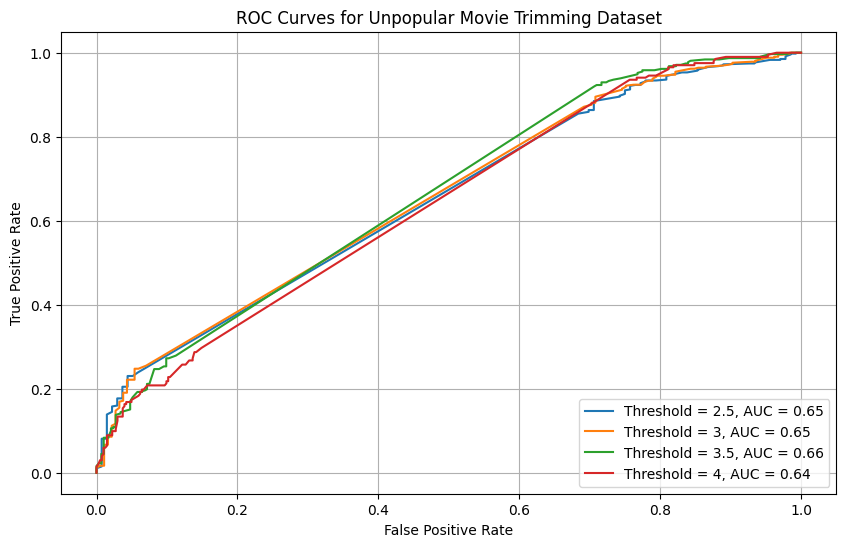

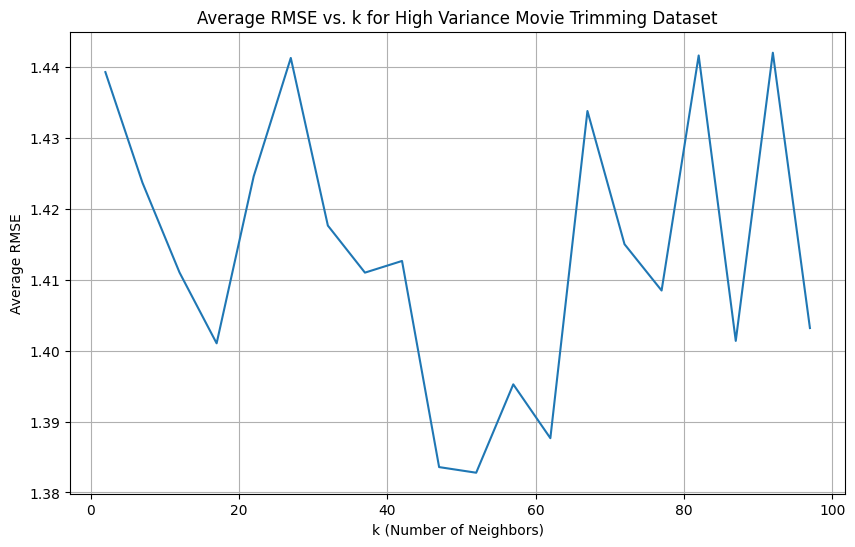

Minimum average RMSE for High Variance Movie Trimming: 1.382786105275836 at k = 52
Computing the pearson similarity matrix...
Done computing similarity matrix.


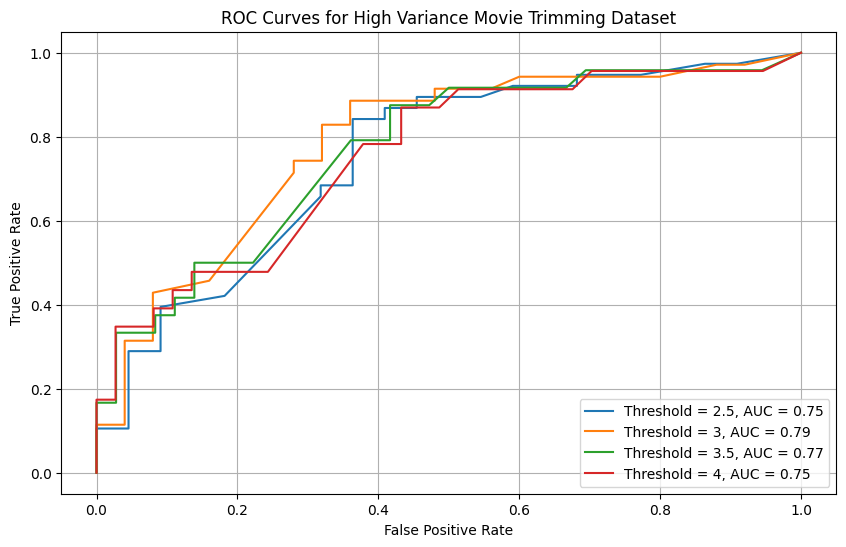

In [ ]:
evaluate_knn(ratings, "No Trimming")
evaluate_knn(popular_subset, "Popular Movie Trimming")
evaluate_knn(unpopular_subset, "Unpopular Movie Trimming")
evaluate_knn(high_variance_subset, "High Variance Movie Trimming")


## QUESTION 8:

Designing the NMF Collaborative Filter:
A Design a NMF-based collaborative filter to predict the ratings of the movies in the original
dataset and evaluate its performance using 10-fold cross-validation. Sweep k (number of
latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and
average MAE obtained by averaging the RMSE and MAE across all 10 folds. If NMF takes
too long, you can increase the step size. Increasing it too much will result in poorer granularity
in your results. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Yaxis) against k (X-axis). For solving this question, use the default value for the regularization
parameter.
B Use the plot from the previous part to find the optimal number of latent factors. Optimal
number of latent factors is the value of k that gives the minimum average RMSE or the
minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal
number of latent factors same as the number of movie genres?
C Performance on trimmed dataset subsets: For each of Popular, Unpopular and HighVariance subsets -
– Design a NMF collaborative filter for each trimmed subset and evaluate its performance
using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step
sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE
across all 10 folds.
– Plot average RMSE (Y-axis) against k (X-axis); item Report the minimum average RMSE.
• Plot the ROC curves for the NMF-based collaborative filter and also report the area under the
curve (AUC) value as done in Question 6.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms.matrix_factorization import NMF
from sklearn.metrics import roc_curve, auc


base_dir = "/content/drive/MyDrive/ECE 219/p3/"

def nmf_filter(data, dataset_name):
  reader = Reader(rating_scale=(0.5, 5))
  surprise_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

  k_values = np.arange(2, 52, 2)
  rmse_results = []
  mae_results = []

  rmse_results_file = base_dir + dataset_name + "_" + "nmf_rmse_results.csv"
  mae_results_file = base_dir + dataset_name + "_" + "nmf_mae_results.csv"

  print(rmse_results_file)
  print(mae_results_file)

  if os.path.exists(rmse_results_file) and os.path.exists(mae_results_file):
      rmse_results_df = pd.read_csv(rmse_results_file)
      rmse_results = list(zip(rmse_results_df['k'], rmse_results_df['rmse']))

      mae_results_df = pd.read_csv(mae_results_file)
      mae_results = list(zip(mae_results_df['k'], mae_results_df['mae']))
  else:
      for k in k_values:
          print(f"Evaluating with k = {k}")
          algo = NMF(n_factors=k)
          cv_results = cross_validate(algo, surprise_data, measures=['rmse', 'mae'], cv=10, verbose=False)

          avg_rmse = np.mean(cv_results['test_rmse'])
          avg_mae = np.mean(cv_results['test_mae'])

          rmse_results.append((k, avg_rmse))
          mae_results.append((k, avg_mae))


      rmse_results_df = pd.DataFrame(rmse_results, columns=['k', 'rmse'])
      rmse_results_df.to_csv(rmse_results_file, index=False)

      mae_results_df = pd.DataFrame(mae_results, columns=['k', 'mae'])
      mae_results_df.to_csv(mae_results_file, index=False)


  # Plotting RMSE
  plt.figure(figsize=(10, 6))
  plt.plot([result[0] for result in rmse_results], [result[1] for result in rmse_results], marker='o')
  plt.xlabel('Number of Latent Factors (k)')
  plt.ylabel('Average RMSE')
  plt.title(f'{dataset_name} NMF Collaborative Filtering: Average RMSE vs. k')
  plt.grid(True)
  plt.show()

  # Plotting MAE
  plt.figure(figsize=(10, 6))
  plt.plot([result[0] for result in mae_results], [result[1] for result in mae_results], marker='o')
  plt.xlabel('Number of Latent Factors (k)')
  plt.ylabel('Average MAE')
  plt.title(f'{dataset_name} NMF Collaborative Filtering: Average MAE vs. k')
  plt.grid(True)
  plt.show()

  min_rmse = np.min(rmse_results)
  optimal_k_rmse = k_values[[i for i,rmse in enumerate(rmse_results) if rmse[1] == min_rmse][0]]

  min_mae = np.min(mae_results)
  optimal_k_mae = k_values[[i for i,mae in enumerate(mae_results) if mae[1] == min_mae][0]]

  print(f"{dataset_name} Optimal k for RMSE: {optimal_k_rmse}, Minimum RMSE: {min_rmse}")
  print(f"{dataset_name} Optimal k for MAE: {optimal_k_mae}, Minimum MAE: {min_mae}")

  best_k = optimal_k_rmse

  algo = NMF(n_factors=best_k)

  reader = Reader(rating_scale=(0.5, 5))
  surprise_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

  # Split data using Surprise's train_test_split
  trainset, testset = train_test_split(surprise_data, test_size=.1)

  algo.fit(trainset)
  predictions = algo.test(testset)

  thresholds = [2.5, 3, 3.5, 4]
  plt.figure(figsize=(10, 6))

  for threshold in thresholds:
      y_true = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
      y_scores = [pred.est for pred in predictions]
      fpr, tpr, _ = roc_curve(y_true, y_scores)
      roc_auc = auc(fpr, tpr)

      plt.plot(fpr, tpr, label=f'Threshold = {threshold}, AUC = {roc_auc:.2f}')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curves for {dataset_name} Dataset')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()


/content/drive/MyDrive/ECE 219/p3/No Trimming_nmf_rmse_results.csv
/content/drive/MyDrive/ECE 219/p3/No Trimming_nmf_mae_results.csv


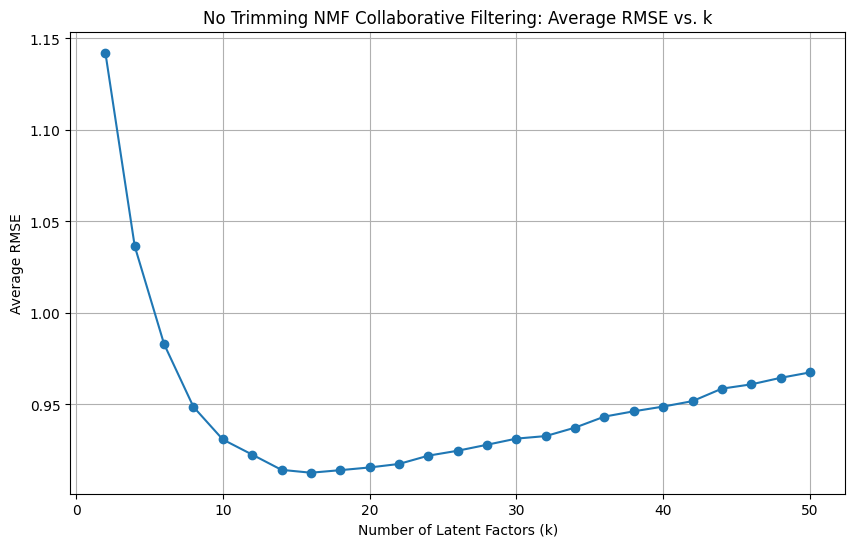

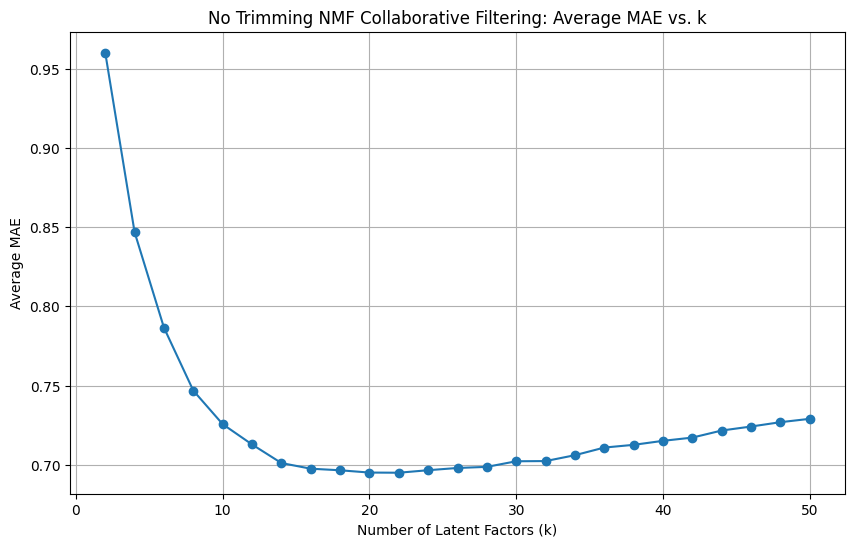

No Trimming Optimal k for RMSE: 16, Minimum RMSE: 0.9126687244441486
No Trimming Optimal k for MAE: 22, Minimum MAE: 0.6949315174523802


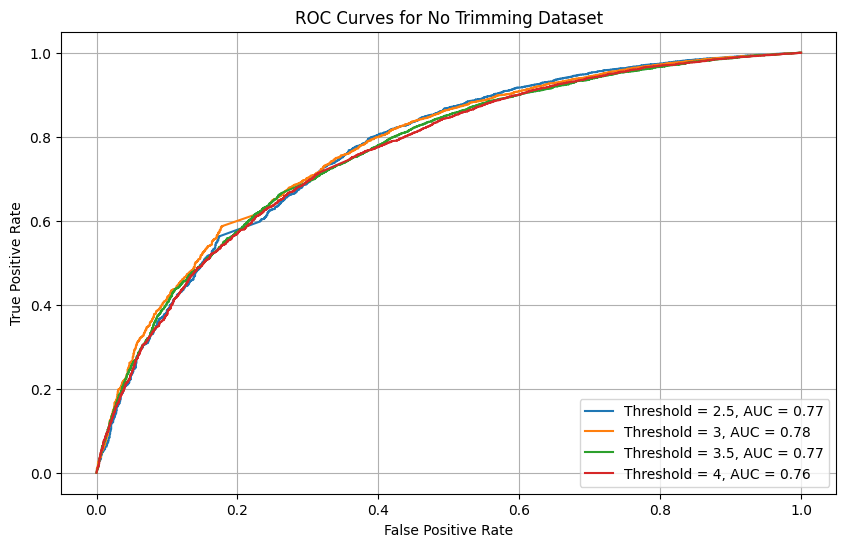

/content/drive/MyDrive/ECE 219/p3/Popular Movie Trimming_nmf_rmse_results.csv
/content/drive/MyDrive/ECE 219/p3/Popular Movie Trimming_nmf_mae_results.csv


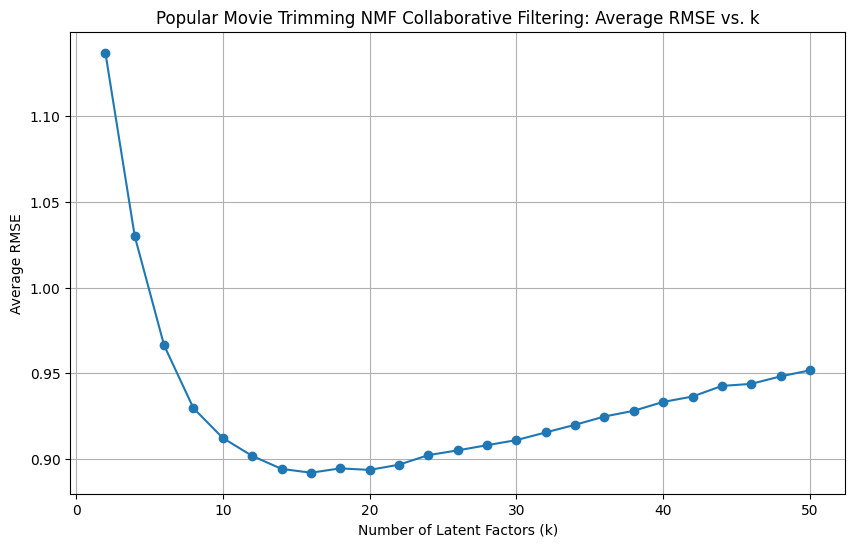

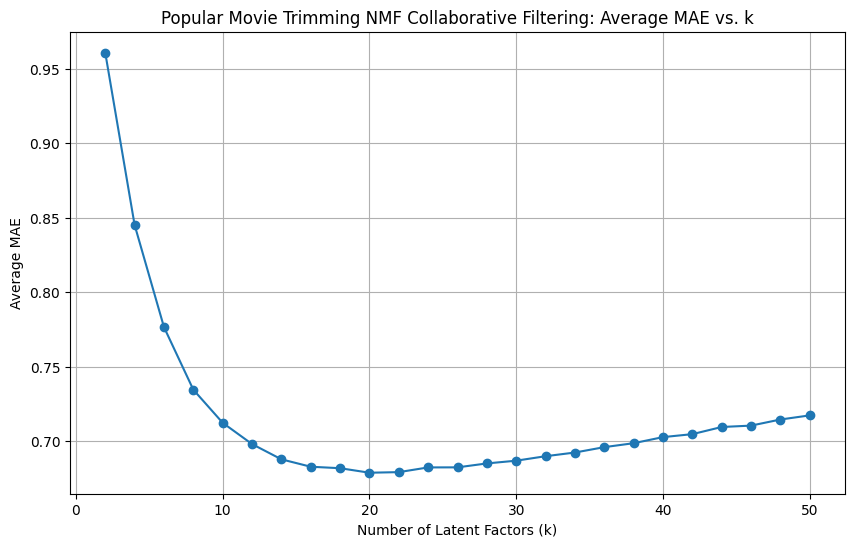

Popular Movie Trimming Optimal k for RMSE: 16, Minimum RMSE: 0.891851172625502
Popular Movie Trimming Optimal k for MAE: 20, Minimum MAE: 0.6787966643300276


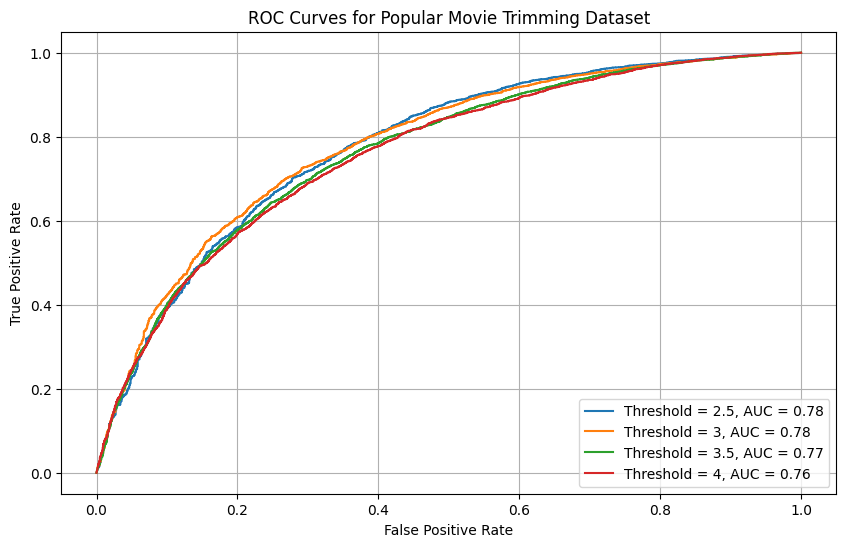

/content/drive/MyDrive/ECE 219/p3/Unpopular Movie Trimming_nmf_rmse_results.csv
/content/drive/MyDrive/ECE 219/p3/Unpopular Movie Trimming_nmf_mae_results.csv


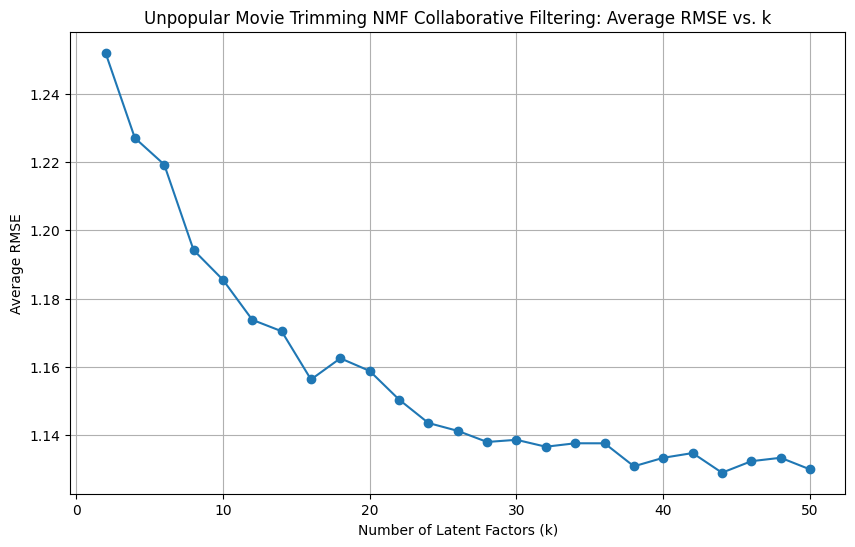

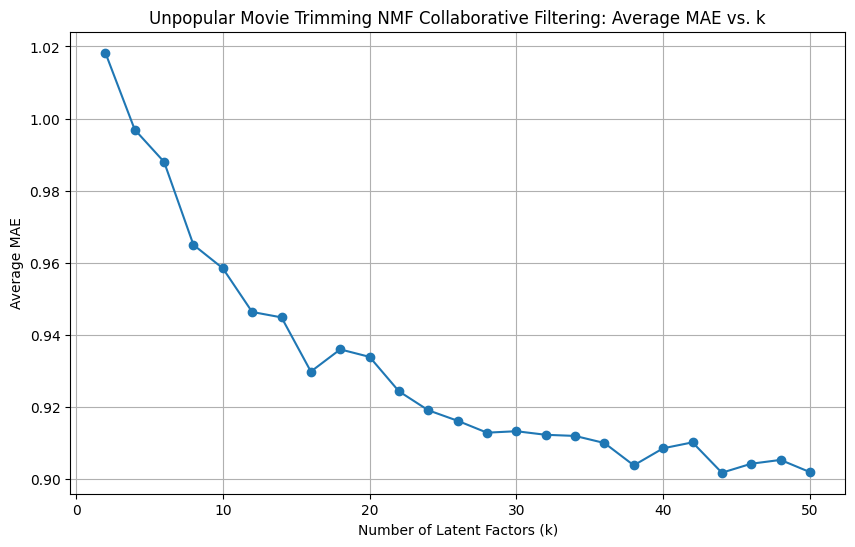

Unpopular Movie Trimming Optimal k for RMSE: 44, Minimum RMSE: 1.1289768432845484
Unpopular Movie Trimming Optimal k for MAE: 44, Minimum MAE: 0.9018288645285336


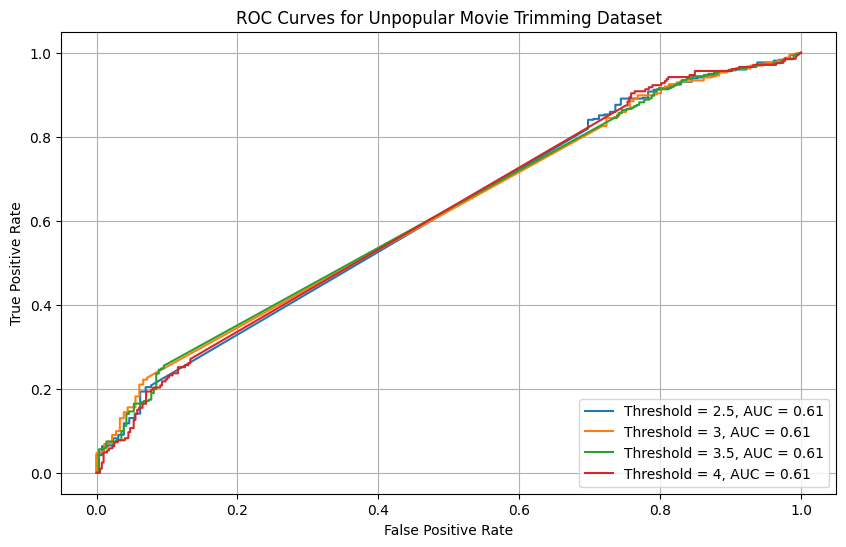

/content/drive/MyDrive/ECE 219/p3/High Variance Movie Trimming_nmf_rmse_results.csv
/content/drive/MyDrive/ECE 219/p3/High Variance Movie Trimming_nmf_mae_results.csv


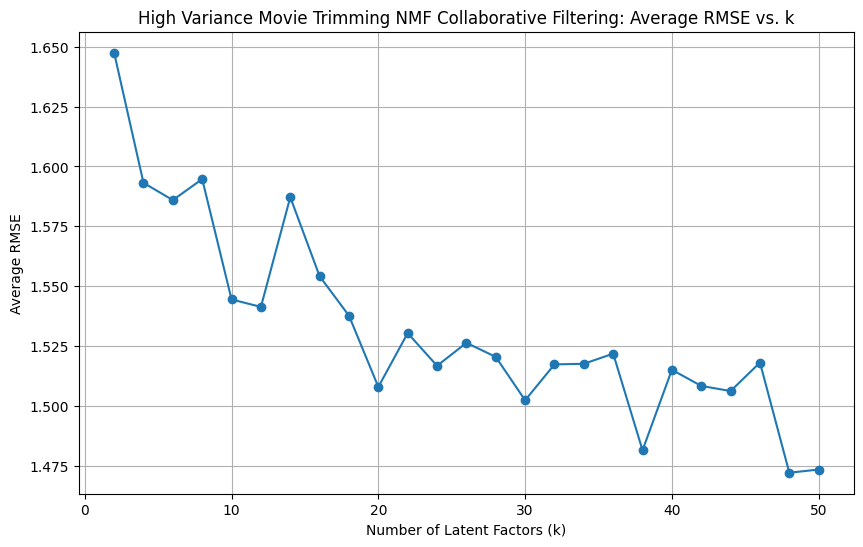

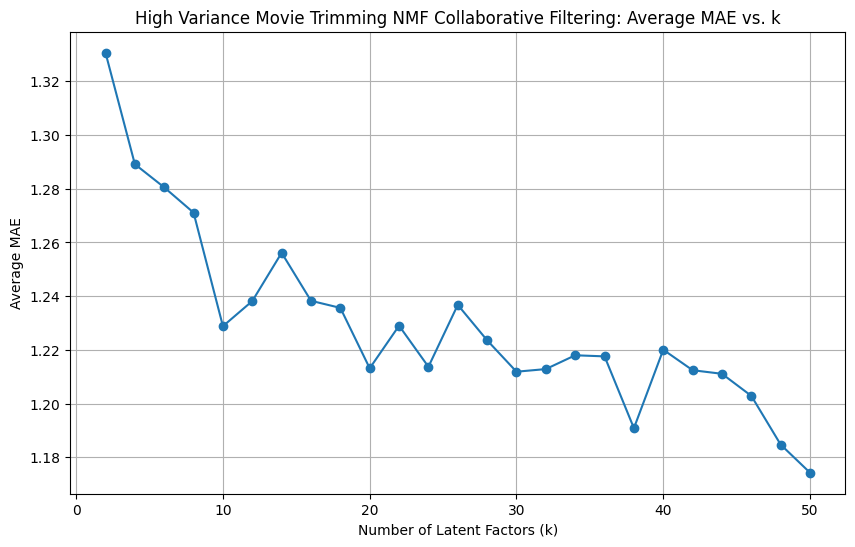

High Variance Movie Trimming Optimal k for RMSE: 48, Minimum RMSE: 1.472088725392624
High Variance Movie Trimming Optimal k for MAE: 50, Minimum MAE: 1.1742671943570984


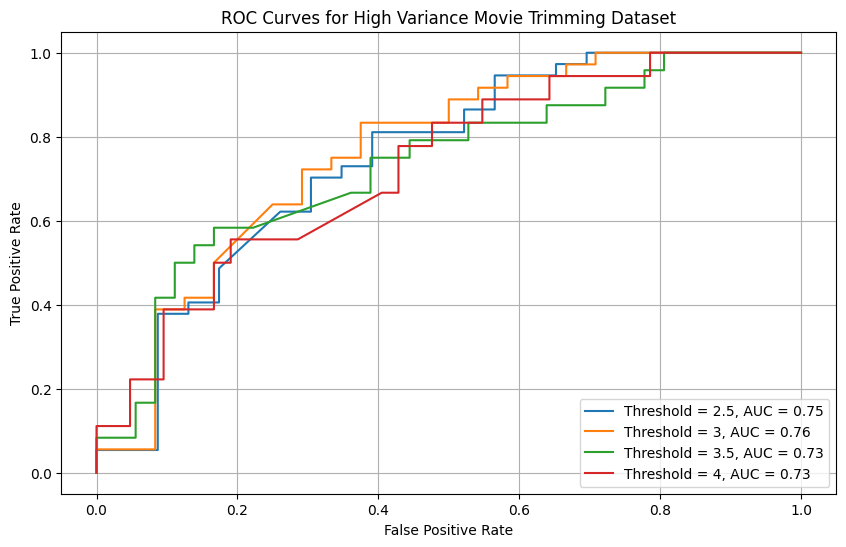

In [ ]:
nmf_filter(ratings, "No Trimming")
nmf_filter(popular_subset, "Popular Movie Trimming")
nmf_filter(unpopular_subset, "Unpopular Movie Trimming")
nmf_filter(high_variance_subset, "High Variance Movie Trimming")

## QUESTION 9:

Interpreting the NMF model: Perform Non-negative matrix factorization on the ratings matrix R to obtain the factor matrices U and V , where U represents the user-latent factors interaction and V represents the movie-latent factors interaction (use k = 20). For each column of V , sort the movies in descending order and report the genres of the top 10 movies. Do the top 10 movies belong to a particular or a small collection of genre? Is there a connection between the latent factors and the movie genres?


In [ ]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader
from surprise.prediction_algorithms.matrix_factorization import NMF

reader = Reader(rating_scale=(0.5, 5))
surprise_data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

k = 20
algo = NMF(n_factors=k)
trainset = surprise_data.build_full_trainset()
algo.fit(trainset)

U = algo.pu  # User-latent factor matrix
V = algo.qi  # Movie-latent factor matrix

movies = pd.read_csv('/content/drive/MyDrive/ECE 219/p3/data/Copy of movies.csv', usecols=['movieId','title','genres'])


In [ ]:
for i in range(k):
    print('=====================================')
    print('Latent Factor #:',i)
    print('=====================================')
    selected_col = V[:,i]
    sorted_col = np.argsort(selected_col)[::-1]
    for i in sorted_col[0:10]:
        print(movies['genres'][i])
    print('\n')

Latent Factor #: 0
Children|Comedy
Comedy|Drama|Romance
Comedy|Drama|Romance
Comedy
Comedy|Crime|Drama
Comedy|Drama|Musical|Sci-Fi
Comedy|Romance
Drama
Mystery|Thriller
Action|Horror|Thriller


Latent Factor #: 1
Drama|Romance|War
Documentary
Comedy
Comedy|Romance
Comedy
Comedy
Children|Comedy
Comedy|Sci-Fi
Crime|Drama
Drama|Musical


Latent Factor #: 2
Drama
Action|Animation|Comedy|Sci-Fi
Drama|Musical|Romance
Drama|Romance|Sci-Fi
Comedy
Comedy|Musical|Romance
Adventure|Animation|Comedy|Fantasy|Romance|Sci-Fi
Drama
Action|Comedy|Drama
Fantasy|Horror


Latent Factor #: 3
Comedy|Drama|Romance
Comedy|Drama
Horror|Romance|Thriller
Horror|Thriller
Drama
Comedy|Romance
Comedy|Drama|Romance
Drama
Comedy|Drama|Romance
Action|Adventure|Comedy|Sci-Fi


Latent Factor #: 4
Comedy
Action
Drama|Horror|Mystery|Thriller
Action|Horror|Sci-Fi
Horror|Thriller
Horror|Mystery|Thriller
Drama|Romance
Comedy|Drama
Drama|Thriller|Western
Musical


Latent Factor #: 5
Action|Adventure|Comedy|Fantasy
Drama|Roman


## QUESTION 10:

Designing the MF Collaborative Filter: A Design a MF-based collaborative filter to predict the ratings of the movies in the original dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter. B Use the plot from the previous part to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres? C Performance on dataset subsets: For each of Popular, Unpopular and High-Variance subsets - – Design a MF collaborative filter for each trimmed subset and evaluate its performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. – Plot average RMSE (Y-axis) against k (X-axis); item Report the minimum average RMSE. 9 • Plot the ROC curves for the MF-based collaborative filter and also report the area under the curve (AUC) value as done in Question 6.







In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms.matrix_factorization import SVD
from sklearn.metrics import roc_curve, auc


base_dir = "/content/drive/MyDrive/ECE 219/p3/"

def mf_bias_filter(data, dataset_name):
  reader = Reader(rating_scale=(0.5, 5))
  surprise_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

  k_values = np.arange(2, 52, 2)
  rmse_results = []
  mae_results = []

  rmse_results_file = base_dir + dataset_name + "_" + "svd_rmse_results.csv"
  mae_results_file = base_dir + dataset_name + "_" + "svd_mae_results.csv"


  if os.path.exists(rmse_results_file) and os.path.exists(mae_results_file):
      rmse_results_df = pd.read_csv(rmse_results_file)
      rmse_results = list(zip(rmse_results_df['k'], rmse_results_df['rmse']))

      mae_results_df = pd.read_csv(mae_results_file)
      mae_results = list(zip(mae_results_df['k'], mae_results_df['mae']))
  else:
      for k in k_values:
          print(f"Evaluating with k = {k}")
          algo = SVD(n_factors=k)
          cv_results = cross_validate(algo, surprise_data, measures=['rmse', 'mae'], cv=10, verbose=False)

          avg_rmse = np.mean(cv_results['test_rmse'])
          avg_mae = np.mean(cv_results['test_mae'])

          rmse_results.append((k, avg_rmse))
          mae_results.append((k, avg_mae))


      rmse_results_df = pd.DataFrame(rmse_results, columns=['k', 'rmse'])
      rmse_results_df.to_csv(rmse_results_file, index=False)

      mae_results_df = pd.DataFrame(mae_results, columns=['k', 'mae'])
      mae_results_df.to_csv(mae_results_file, index=False)


  # Plotting RMSE
  plt.figure(figsize=(10, 6))
  plt.plot([result[0] for result in rmse_results], [result[1] for result in rmse_results], marker='o')
  plt.xlabel('Number of Latent Factors (k)')
  plt.ylabel('Average RMSE')
  plt.title(f'{dataset_name} MF w/ Bias Collaborative Filtering: Average RMSE vs. k')
  plt.grid(True)
  plt.show()

  # Plotting MAE
  plt.figure(figsize=(10, 6))
  plt.plot([result[0] for result in mae_results], [result[1] for result in mae_results], marker='o')
  plt.xlabel('Number of Latent Factors (k)')
  plt.ylabel('Average MAE')
  plt.title(f'{dataset_name} MF w/ Bias Collaborative Filtering: Average MAE vs. k')
  plt.grid(True)
  plt.show()

  min_rmse = np.min(rmse_results)
  optimal_k_rmse = k_values[[i for i,rmse in enumerate(rmse_results) if rmse[1] == min_rmse][0]]

  min_mae = np.min(mae_results)
  optimal_k_mae = k_values[[i for i,mae in enumerate(mae_results) if mae[1] == min_mae][0]]

  print(f"{dataset_name} Optimal k for RMSE: {optimal_k_rmse}, Minimum RMSE: {min_rmse}")
  print(f"{dataset_name} Optimal k for MAE: {optimal_k_mae}, Minimum MAE: {min_mae}")

  best_k = optimal_k_rmse

  algo = SVD(n_factors=best_k)

  reader = Reader(rating_scale=(0.5, 5))
  surprise_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

  # Split data using Surprise's train_test_split
  trainset, testset = train_test_split(surprise_data, test_size=.1)

  algo.fit(trainset)
  predictions = algo.test(testset)

  thresholds = [2.5, 3, 3.5, 4]
  plt.figure(figsize=(10, 6))

  for threshold in thresholds:
      y_true = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
      y_scores = [pred.est for pred in predictions]
      fpr, tpr, _ = roc_curve(y_true, y_scores)
      roc_auc = auc(fpr, tpr)

      plt.plot(fpr, tpr, label=f'Threshold = {threshold}, AUC = {roc_auc:.2f}')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curves for {dataset_name} Dataset')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()


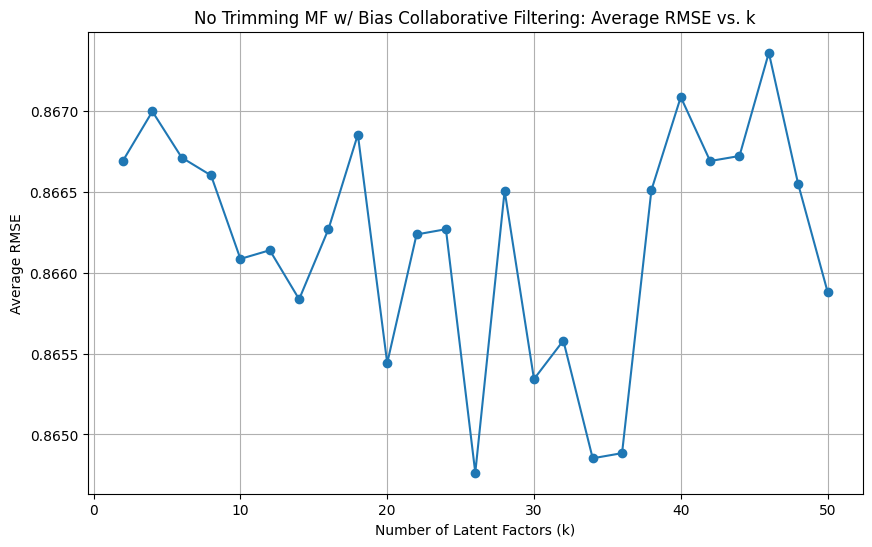

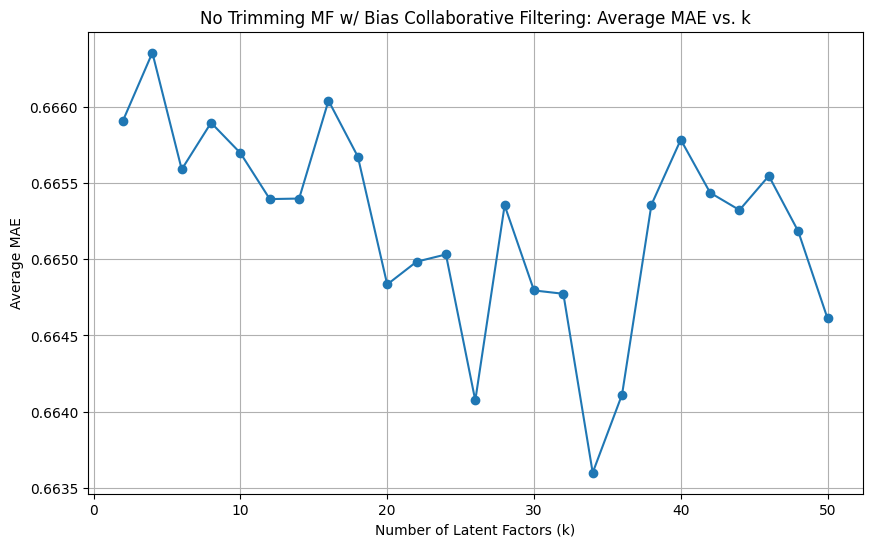

No Trimming Optimal k for RMSE: 26, Minimum RMSE: 0.8647633632957744
No Trimming Optimal k for MAE: 34, Minimum MAE: 0.6635982420291535


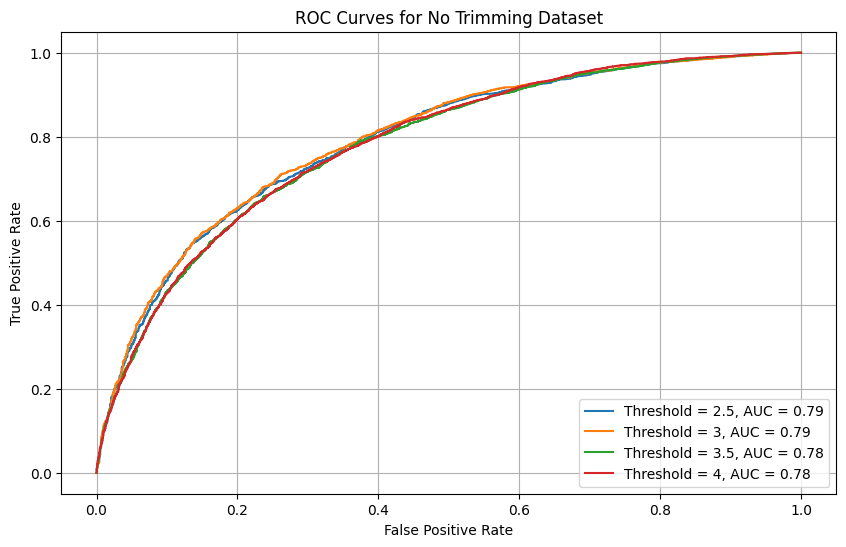

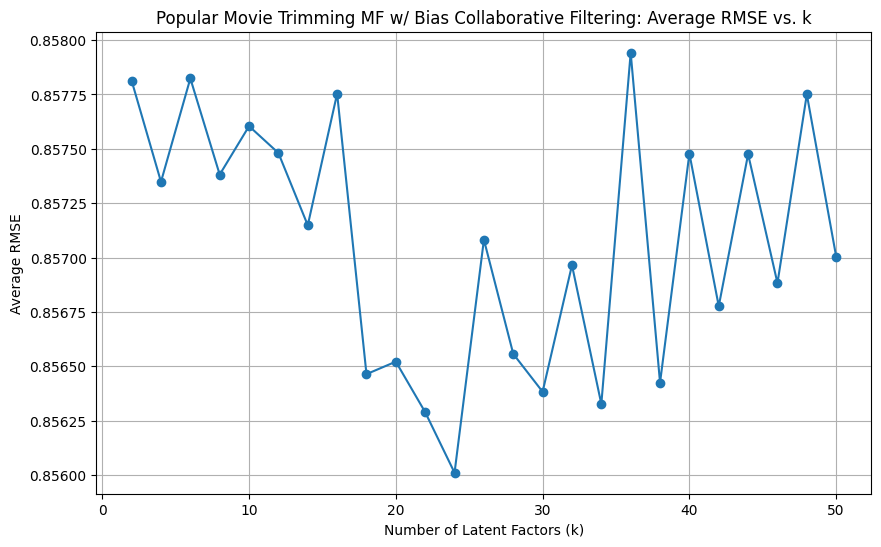

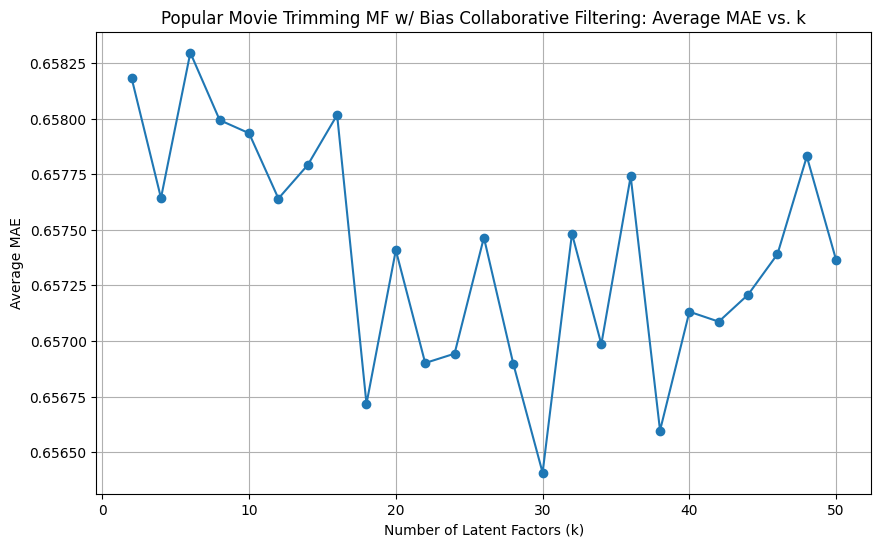

Popular Movie Trimming Optimal k for RMSE: 24, Minimum RMSE: 0.8560097954505845
Popular Movie Trimming Optimal k for MAE: 30, Minimum MAE: 0.6564073841438658


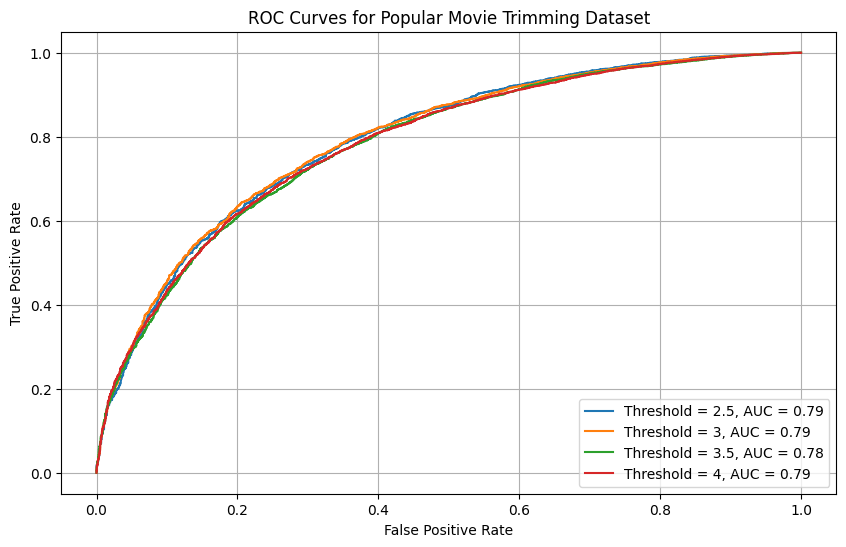

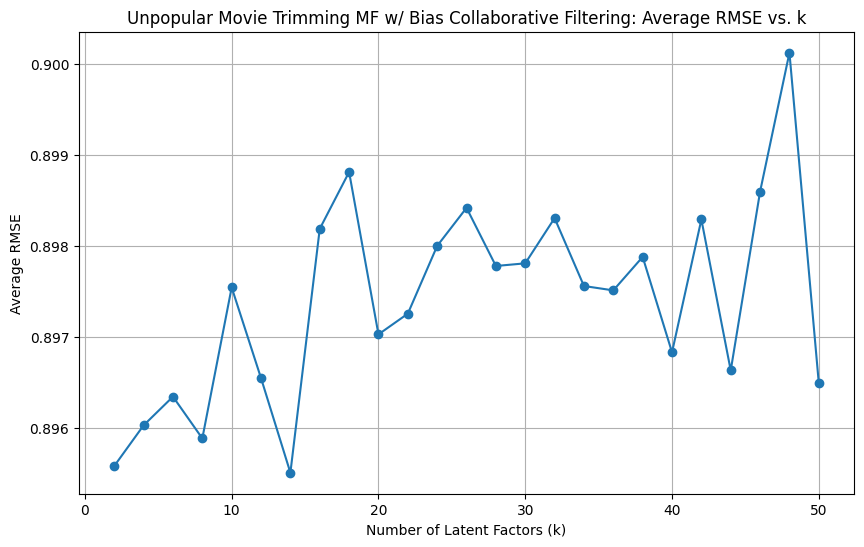

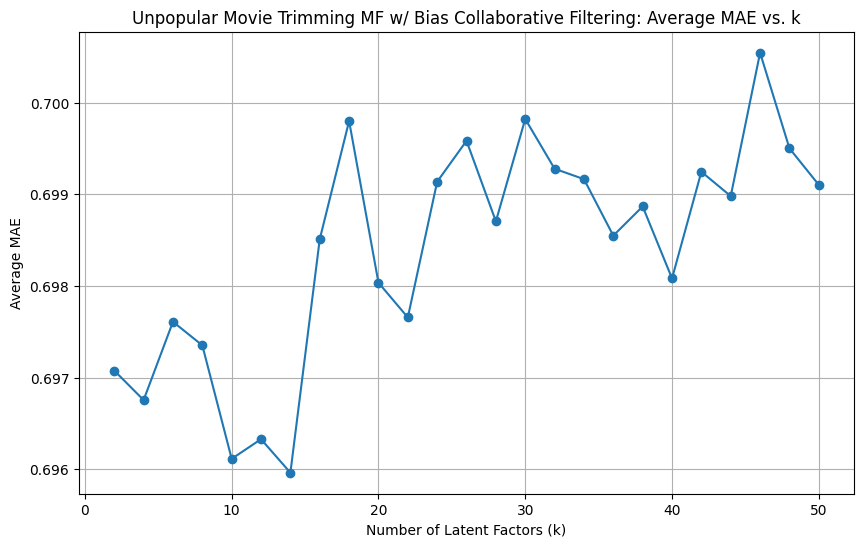

Unpopular Movie Trimming Optimal k for RMSE: 14, Minimum RMSE: 0.895510478107943
Unpopular Movie Trimming Optimal k for MAE: 14, Minimum MAE: 0.6959632193012544


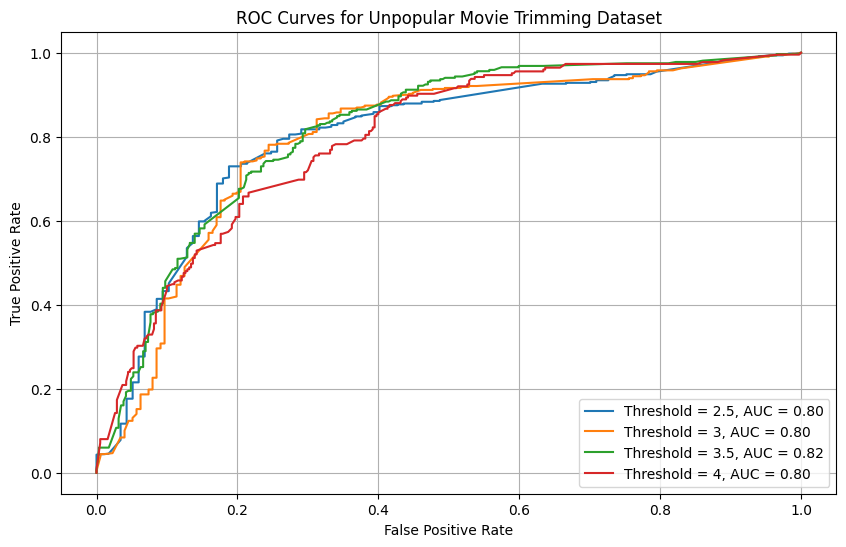

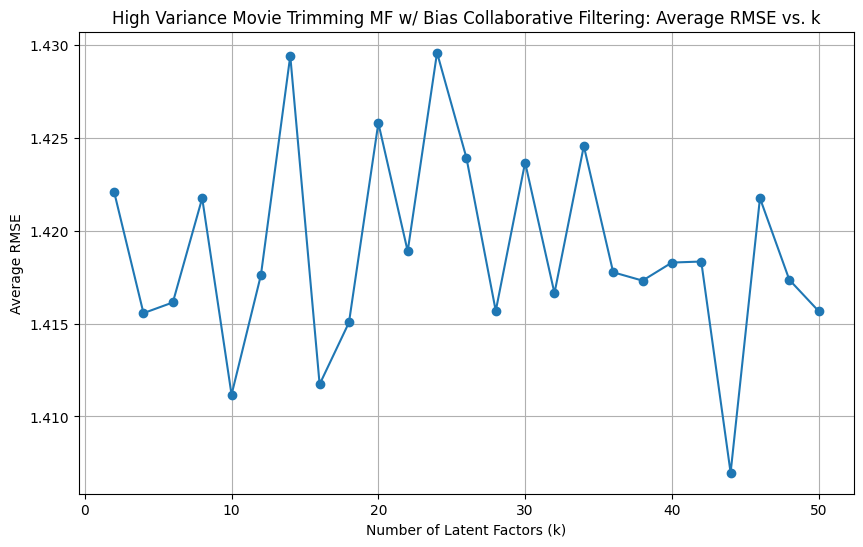

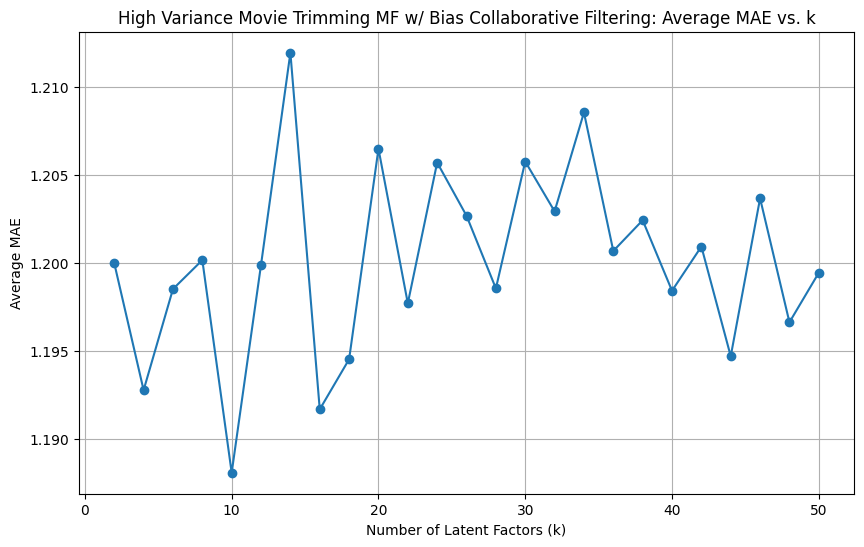

High Variance Movie Trimming Optimal k for RMSE: 44, Minimum RMSE: 1.4069760513046656
High Variance Movie Trimming Optimal k for MAE: 10, Minimum MAE: 1.188055206745927


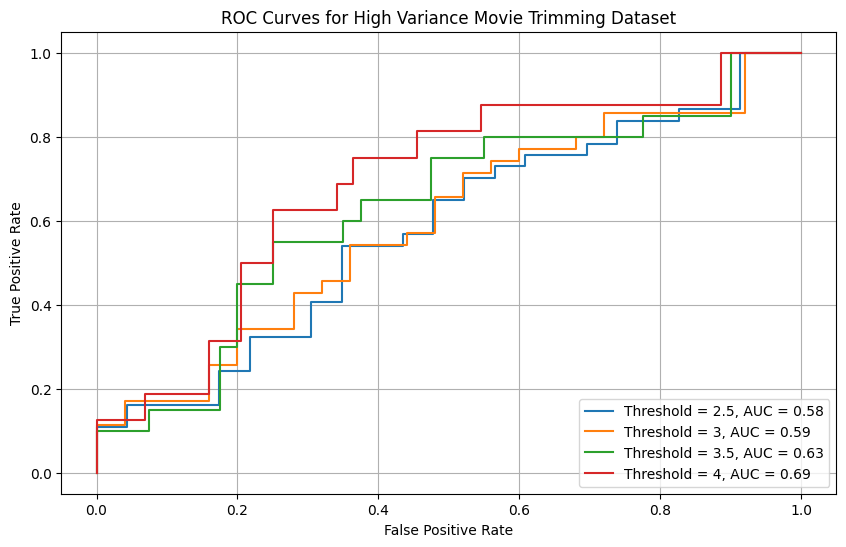

In [ ]:
mf_bias_filter(ratings, "No Trimming")
mf_bias_filter(popular_subset, "Popular Movie Trimming")
mf_bias_filter(unpopular_subset, "Unpopular Movie Trimming")
mf_bias_filter(high_variance_subset, "High Variance Movie Trimming")

In [ ]:
import pandas as pd
from collections import Counter

movies = pd.read_csv('/content/drive/MyDrive/ECE 219/p3/data/Copy of movies.csv')

all_genres = []
for index, row in movies.iterrows():
    genres = row['genres'].split('|')
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
num_genres = len(genre_counts)

print(f"Total number of movie genres: {num_genres}")


Total number of movie genres: 20


## QUESTION 11:

Designing a Na¨ıve Collaborative Filter:
• Design a naive collaborative filter to predict the ratings of the movies in the original dataset
and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by
averaging the RMSE across all 10 folds. Report the average RMSE.
• Performance on dataset subsets: For each of Popular, Unpopular and High-Variance test
subsets -
– Design a naive collaborative filter for each trimmed set and evaluate its performance using
10-fold cross validation.
– Compute the average RMSE by averaging the RMSE across all 10 folds. Report the
average RMSE.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def naive_filter(data, dataset_name):
    # Initialize KFold cross-validation (10 folds)
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(data):
        # Split into train and validation sets
        train_data, test_data = data.iloc[train_index], data.iloc[test_index]

        # Compute user mean ratings on the training set
        user_means = train_data.groupby('userId')['rating'].mean().to_dict()

        # Ensure we are working with a copy of test_data
        test_data = test_data.copy()

        # Predict ratings for test set using user mean
        test_data.loc[:, 'predicted_rating'] = test_data['userId'].map(user_means)

        # Fill missing predictions (new users) with global mean
        global_mean = train_data['rating'].mean()
        test_data.loc[:, 'predicted_rating'] = test_data['predicted_rating'].fillna(global_mean)

        # Compute RMSE for this fold
        rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['predicted_rating']))
        rmse_scores.append(rmse)

    # Compute average RMSE across all 10 folds
    avg_rmse = np.mean(rmse_scores)

    print(f"Naive Collaborative Filter ({dataset_name}): Average RMSE = {avg_rmse:.4f}")
    return avg_rmse



In [ ]:
naive_filter(ratings, "No Trimming")
naive_filter(popular_subset, "Popular Movie Trimming")
naive_filter(unpopular_subset, "Unpopular Movie Trimming")
naive_filter(high_variance_subset, "High Variance Movie Trimming")

Naive Collaborative Filter (No Trimming): Average RMSE = 0.9411
Naive Collaborative Filter (Popular Movie Trimming): Average RMSE = 0.9374
Naive Collaborative Filter (Unpopular Movie Trimming): Average RMSE = 0.8979
Naive Collaborative Filter (High Variance Movie Trimming): Average RMSE = 1.4444


1.4444097938377802

## QUESTION 12:

Comparing the most performant models across architecture: Plot the best ROC curves (threshold = 3) for the k-NN, NMF, and MF with bias based collaborative filters
in the same figure. Use the figure to compare the performance of the filters in predicting the ratings
of the movies.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, KNNWithMeans
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF
from sklearn.metrics import roc_curve, auc

trainset, testset = train_test_split(surprise_data, test_size=.1)

knn = KNNWithMeans(k=20, sim_options={'name': 'cosine', 'user_based': True})
nmf = NMF(n_factors=16)
svd = SVD(n_factors=26)

models = {"KNN": knn, "NMF": nmf, "MF": svd}



In [ ]:
def plot_roc(models, threshold=3):
    plt.figure(figsize=(8, 6))

    for model_name, model in models.items():
        # Get predictions
        predictions = model.fit(trainset).test(testset)

        # Extract true ratings and predicted scores
        y_true = np.array([1 if pred.r_ui >= threshold else 0 for pred in predictions])
        y_scores = np.array([pred.est for pred in predictions])

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

    # Labels and legend
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison for k-NN, NMF, and MF")
    plt.legend()
    plt.grid()
    plt.show()

Computing the cosine similarity matrix...
Done computing similarity matrix.


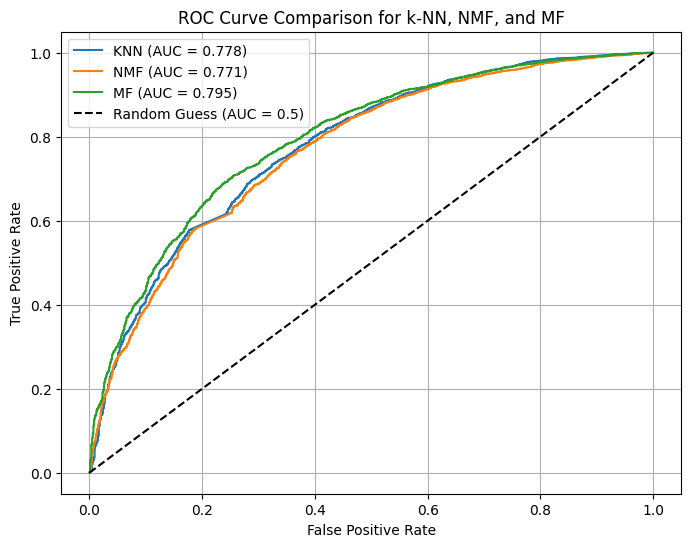

In [ ]:
plot_roc(models)